# CCD Data reduction  with ccdproc 

The ccdproc package provides:

- An image class, CCDData, that includes an uncertainty for the data, units and methods for performing arithmetic with images including the propagation of uncertainties.
- A set of functions performing common CCD data reduction steps (e.g. dark subtraction, flat field correction) with a flexible mechanism for logging reduction steps in the image metadata.
- A function for reprojecting an image onto another WCS, useful for stacking science images. The actual reprojection is done by the reproject package.
- A class for combining and/or clipping images, Combiner, and associated functions.
- A class, ImageFileCollection, for working with a directory of images.


In [7]:
import numpy as np
from astropy import units as u
import ccdproc
image_1 = ccdproc.CCDData(np.ones((10, 10)), unit="adu")

In [8]:
# Set up matplotlib and use a nicer set of plot parameters
#config InlineBackend.rc = {}
#config Backend.rc = {}
import matplotlib
matplotlib.rc_file("templates/matplotlibrc")  # default config obtained from astropy examples
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
sub_image = image_1[:, 1:-3]  # a CCDData object
sub_data =  image_1.data[:, 1:-3]  # a numpy array
type(sub_data)

numpy.ndarray

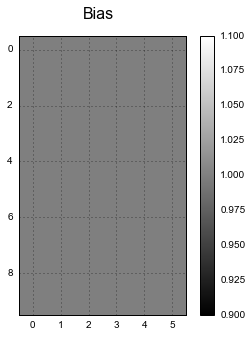

In [16]:
NX=1
NY=1
fig, axarr = plt.subplots(NY,NX,figsize=(5,5))

plt.imshow(sub_data, cmap='gray')
plt.colorbar()
title='Bias'

plt.suptitle(title,size=16)
plt.show()


In [17]:
dark = ccdproc.CCDData(np.random.normal(size=(10, 10)), unit="adu")
dark_sub = ccdproc.subtract_dark(image_1, dark,dark_exposure=30*u.second,data_exposure=15*u.second,scale=True)

In [18]:
dark_sub_gained = ccdproc.gain_correct(dark_sub, 1.5 * u.photon/u.adu, add_keyword='gain_corrected')

In [19]:
my_log = {'gain_correct': 'Gain value was 1.5','calstat': 'G'}
dark_sub_gained = ccdproc.gain_correct(dark_sub,1.5 * u.photon/u.adu,add_keyword=my_log)

In [22]:
flat = ccdproc.CCDData(np.random.normal(1.0, scale=0.1, size=(10, 10)), unit='adu')
image_1_flat = ccdproc.flat_correct(image_1, flat)

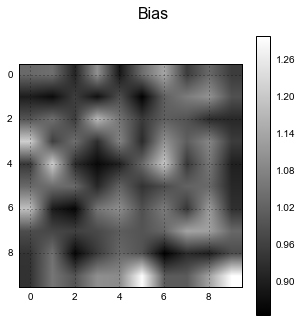

In [21]:
NX=1
NY=1
fig, axarr = plt.subplots(NY,NX,figsize=(5,5))

plt.imshow(image_1_flat.data, cmap='gray')
plt.colorbar()
title='Bias'

plt.suptitle(title,size=16)
plt.show()

In [34]:
from __future__ import division, print_function
from ccdproc import ImageFileCollection
import numpy as np
from glob import glob
import os
path='/Users/dagoret-campagnesylvie/iraf/MonoCamMay2016/20160509'
filename='mbias_01.fits'
image_file=os.path.join(path,filename)

In [26]:
# dirs = glob(path)
#for d in dirs:
#    print(d)
#    ic = ImageFileCollection(d, keywords='*.fits')
#    for data, fname in ic.data(imagetyp='LIGHT', return_fname=True):
#        if data.mean() > 4000.:
#            print(fname)

In [38]:
ccd1 = ccdproc.CCDData.read(image_file, hdu=1,unit="adu")
ccd2 = ccdproc.CCDData.read(image_file, hdu=2,unit="adu")